In [35]:
import numpy as np
from utils.utils import *
from tqdm import tqdm
from torchvision import transforms
from utils.model import *
from utils.BYOL_models import *

In [36]:
# ('mnist', 'femnist', 'fmnist', 'cifar10', 'cifar100', 'svhn')
data_path = "./data"
dataset = "cifar10"
# ('noniid-labeldir', 'noniid-label#2', 'iid', 'default') default only for femnist
partition = "noniid-label#2"
client_num = 5
batch_size = 32
train_batch = 32
test_batch = 128
avg_freq = 10
sim_weight = False
save_path = f"./model/SplitFSSL_BYOL32_similarity/resnet18Maxpooling_sim_weight({sim_weight})_{dataset}_{batch_size}_{avg_freq}_{partition}_{client_num}"
# train_dl, test_dl, train_ds, test_ds = get_dataloader(dataset, data_path, train_batch, test_batch)

# dataset = "cifar10"
# cifar10train_dl, cifar10test_dl, cifar10train_ds, cifar10test_ds = get_dataloader(dataset, data_path, train_batch, test_batch)

In [37]:
# if using checkpoint to train
# epoch = 0feature_dict
checkpath = save_path + "/checkpoint_0506.pth.tar" 
checkpoint = torch.load(checkpath)
feature_sim = checkpoint['feature_dict']
# print(epoch)
# optimizer_server.load_state_dict(checkpoint['optimizer'][0])
# if sim_weight:
#     for clientidx in range(client_num):
#         client_models[clientidx].online_encoder.load_state_dict(checkpoint['state_dict'][clientidx])
# else:
#     for localmodel in client_models:
#         localmodel.online_encoder.load_state_dict(checkpoint['state_dict'])

# for clientidx in range(client_num):
#     optimizer_clients[clientidx].load_state_dict(checkpoint['optimizer'][clientidx+1])

In [38]:
clients = [[] for i in range(5)] 
print(f"sim_weight : {sim_weight}")
for i in range(401):
    if (i+1) % 50 == 0:
        clients[0].append(feature_sim[i][0])
        clients[1].append(feature_sim[i][1])
        clients[2].append(feature_sim[i][2])
        clients[3].append(feature_sim[i][3])
        clients[4].append(feature_sim[i][4])
        # print(f"epoch {i} : {feature_sim[i]}")

sim_weight : False


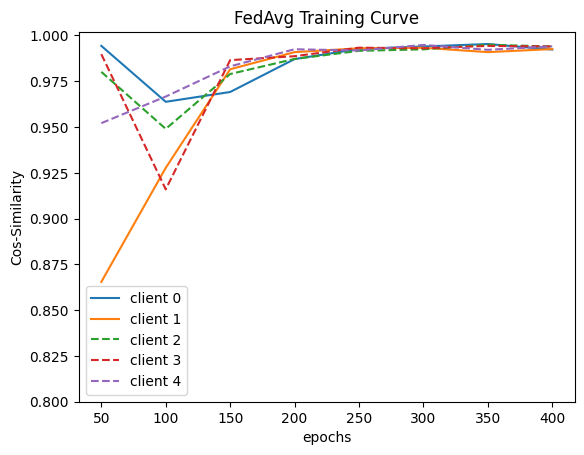

In [40]:
import matplotlib.pyplot as plt

epoch = [i*50 for i in range(1,9)]

plt.plot(epoch, clients[0], label='client 0')
plt.plot(epoch, clients[1], label='client 1')
plt.plot(epoch, clients[2], linestyle='--', label='client 2')
plt.plot(epoch, clients[3], linestyle='--', label='client 3')
plt.plot(epoch, clients[4], linestyle='--', label='client 4')

plt.ylim(bottom=0.8)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Cos-Similarity')
plt.title('FedAvg Training Curve')
plt.show()

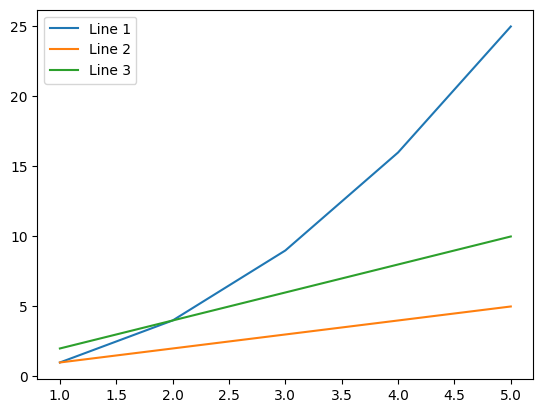

In [6]:
import matplotlib.pyplot as plt

# 示例数据
x = [1, 2, 3, 4, 5]
y1 = [1, 4, 9, 16, 25]
y2 = [1, 2, 3, 4, 5]
y3 = [2, 4, 6, 8, 10]

# 绘制曲线
plt.plot(x, y1, label='Line 1')
plt.plot(x, y2, label='Line 2')
plt.plot(x, y3, label='Line 3')

# 添加图例
plt.legend()

# 显示图形
plt.show()